In [178]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd 
import json
from pprintpp import pprint as pprint
import sklearn
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.figsize'] = (10,8)

In [179]:
#READ INTO DF POPULATION DATA FROM OPEN NYC DATABASE 
with open('data/population2010_opendatanyc.json') as f:
    json_data = f.read()
    data = json.loads(json_data)['data']
    cols = json.loads(json_data)['meta']['view']['columns']
    cols = [x['fieldName'] for x in cols]

    df = pd.DataFrame(data, columns=cols)
    df = df[df.year == "2010"].reset_index().set_index("fips_county_code",drop=True)
    df.population = [int(x) for x in df.population]

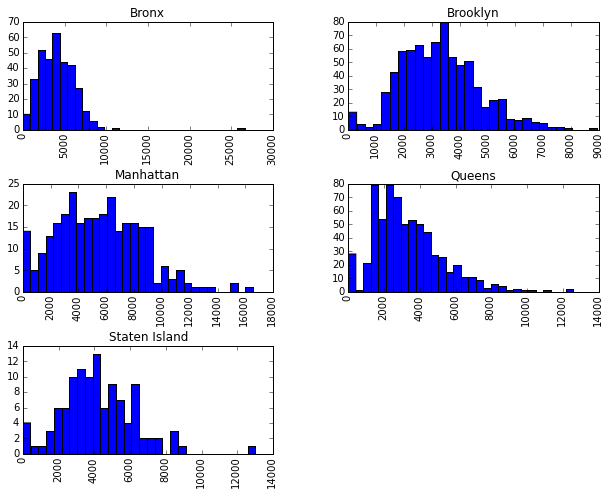

In [180]:
#PLOT DATASET BY BOROUGH
x = df.hist(column='population',by='borough',bins=30)

In [181]:
#Get zip-code level demographic information from US Census Bureau
data = pd.read_csv('data/zcta_tract_rel_10.txt',dtype=str)
data.drop_duplicates(subset= 'ZCTA5', inplace = True)
data = data[(data['STATE'] == '36') & (data['COUNTY'] == '061')] 
data.head(5)

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,...,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
9554,10001,36,061,005800,36061005800,471,311,31705,31705,21102,...,175468,175468,2.23,2.49,1.97,1.97,13.41,13.2,18.07,18.07
9565,10002,36,061,000201,36061000201,3058,1060,90205,90205,81410,...,179176,90205,3.76,3.07,3.96,3.96,100,100,50.34,100
9580,10003,36,061,003602,36061003602,3151,1597,89004,89004,56024,...,89004,89004,5.62,5.14,5.96,5.96,100,100,100,100
9593,10004,36,061,000100,36061000100,2,1,78638,78638,3089,...,78638,78638,.06,.05,5.42,5.42,100,100,100,100
9601,10005,36,061,000700,36061000700,6839,4619,174566,174566,7135,...,449278,253931,95.85,86.87,91.68,91.68,84.34,84.8,38.85,68.75


In [182]:
#get population for each zip code

In [183]:
#READ IN CENSUS ECONOMIC/SOCIAL DATA (5 YR ACS, 2010)
with open("../data/ss10hny.csv") as f:
    census_dat = pd.read_csv(f, sep=',')

IOError: [Errno 2] No such file or directory: '../data/ss10hny.csv'

###GET COLUMN ABBREVIATION DEFINITIONS FROM THIS URL:
http://api.census.gov/data/2013/acs5/profile/variables.json

DP03_0062M = "Median Household Income, all households"<br>
DP03_0063E = "Mean Household Income, all households"

Using my API key for the Census Bureau, I can get listings for various economic and
social variables using, e.g.,

http://api.census.gov/data/2013/acs5?get=NAME,B01001_001E&for=tract:*&in=state:36&key=641a17d8852c486df8a332c73a53b8aec9ec801a

<strong>Not sure about data above in this cell, the data from the csv file matches this table found in my insight/data directory: PUMSDataDict10.pdf </strong>

FINCP = "Family Income in 2010 dollars" !for non-2010 years use ADJINC factor to adjust to 2010 values.
HINCP = "Household Income in 2010 dollars" - difference with FINCP? 
Answer: FINCP is not always available 

###Yelp API: 
####Console: 
https://www.yelp.com/developers/api_console
####Python: 
https://www.yelp.com/developers/documentation/v2/search_api 
as well as https://github.com/Yelp/yelp-api/tree/master/v2
<br>
term = 'thai' 

sort=1 (by distance)

location = "10025" (zipcode)   OR   
ll=latitude,longitude,[accuracy,altitude,altitude_accuracy] the last three being optional
limit = 40 (max?) 

category_filter = 'restaurant,thai' (searches for categories restaurant and THAI)

radius_filter = 1000 (in meters, max = 40 kilometers)

In [220]:
#Get demographic + number of restaurant data

import pandas as pd

df = pd.read_json("data/basic_table.json").reset_index()

df['ZCTA5'].astype(str)

0     10001
1     10002
2     10003
3     10004
4     10005
5     10006
6     10007
7     10009
8     10010
9     10011
10    10012
11    10013
12    10014
13    10016
14    10017
15    10018
16    10019
17    10020
18    10021
19    10022
20    10023
21    10024
22    10025
23    10026
24    10027
25    10028
26    10029
27    10030
28    10031
29    10032
30    10033
31    10034
32    10035
33    10036
34    10037
35    10038
36    10039
37    10040
38    10044
39    10065
Name: ZCTA5, dtype: object

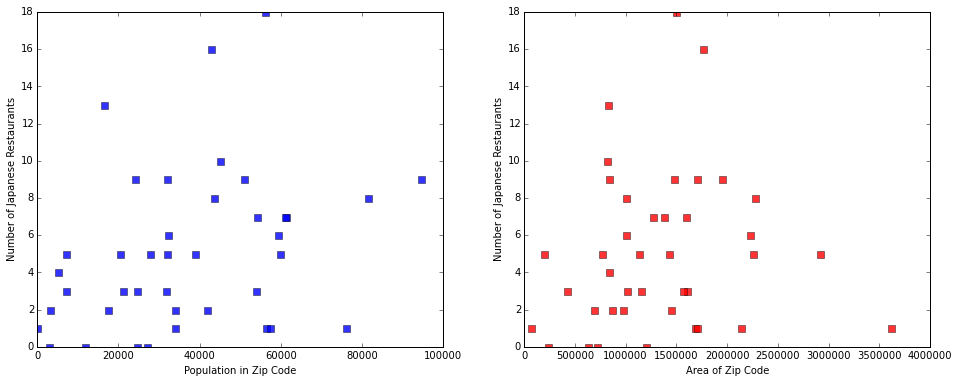

In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,6)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(df.ZPOP,df.number_restaurants,marker='s',color='blue',linestyle="None",markersize=7,alpha=0.8)
ax1.set_xlabel("Population in Zip Code")
ax1.set_ylabel("Number of Japanese Restaurants")
ax2 = fig.add_subplot(122)
ax2.plot(df.ZAREALAND,df.number_restaurants,marker='s',color='red',linestyle="None",markersize=7,alpha=0.8)
ax2.set_xlabel("Area of Zip Code")
ax2.set_ylabel("Number of Japanese Restaurants")

In [222]:
#Now import income per capita information - from zipatlas.com

In [223]:
#Get zip-code level demographic information from US Census Bureau
income_data = pd.read_csv('data/income_zipcode.dat',dtype=str)
#df.ZCTA5
income_data['ZCTA5'] = income_data['ZCTA5'].astype(int)
income_data['ZCTA5']
df2 = df.merge(income_data,left_on="ZCTA5",right_on="ZCTA5",how="inner")
df2.income = df2.income.astype(float)
df2.income

0     23797.67
1      9064.91
2     38056.80
3     56909.50
4     48485.98
5     48702.99
6     59134.55
7     20290.91
8     38323.30
9     39990.90
10    33132.30
11    17100.00
12    42968.30
13    42526.90
14    47124.49
15    25634.21
16    35137.70
17        0.00
18    46301.84
19    52211.69
20    44983.80
21    43857.30
22    25117.68
23     9217.62
24    10381.17
25    45095.90
26     8389.43
27     7712.45
28     8581.27
29     8774.92
30    10519.46
31    10798.17
32     5685.50
33    25309.88
34    13906.28
35    14983.73
36     7118.85
37     9895.39
38    21634.63
Name: income, dtype: float64

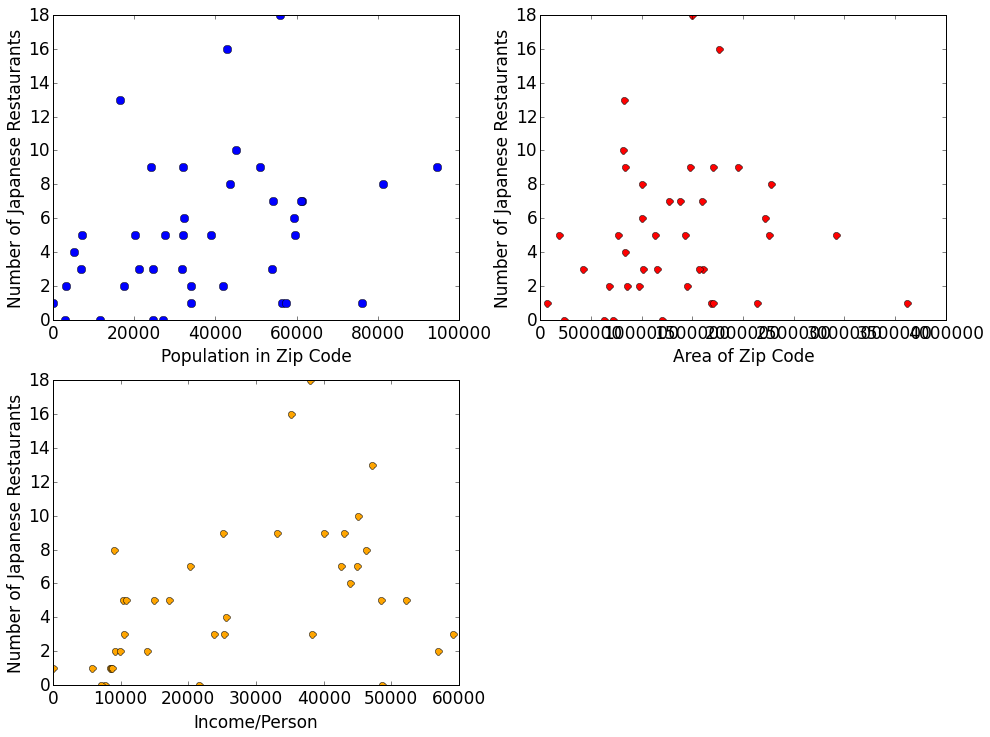

In [224]:
mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['font.size'] = 17
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(df.ZPOP,df.number_restaurants,marker='o',color='blue',linestyle="None",markersize=8,alpha=1.0)
ax1.set_xlabel("Population in Zip Code")
ax1.set_ylabel("Number of Japanese Restaurants")
ax2 = fig.add_subplot(222)
ax2.plot(df.ZAREALAND,df.number_restaurants,marker='o',color='red',linestyle="None",markersize=7,alpha=1.0)
ax2.set_xlabel("Area of Zip Code")
ax2.set_ylabel("Number of Japanese Restaurants")
ax3 = fig.add_subplot(223)
ax3.plot(df2.income,df2.number_restaurants,marker='o',color='orange',linestyle="None",markersize=7,alpha=1.0)
ax3.set_xlabel("Income/Person")
ax3.set_ylabel("Number of Japanese Restaurants")

In [217]:
#and now for another type of food
#Get demographic + number of restaurant data

import pandas as pd

df = pd.read_json("data/basic_table_mexican.json").reset_index()

df['ZCTA5'].astype(str)

0     10001
1     10002
2     10003
3     10004
4     10005
5     10006
6     10007
7     10009
8     10010
9     10011
10    10012
11    10013
12    10014
13    10016
14    10017
15    10018
16    10019
17    10020
18    10021
19    10022
20    10023
21    10024
22    10025
23    10026
24    10027
25    10028
26    10029
27    10030
28    10031
29    10032
30    10033
31    10034
32    10035
33    10036
34    10037
35    10038
36    10039
37    10040
38    10044
39    10065
Name: ZCTA5, dtype: object

In [218]:
#Get zip-code level demographic information from US Census Bureau
income_data = pd.read_csv('data/income_zipcode.dat',dtype=str)
#df.ZCTA5
income_data['ZCTA5'] = income_data['ZCTA5'].astype(int)
income_data['ZCTA5']
df2 = df.merge(income_data,left_on="ZCTA5",right_on="ZCTA5",how="inner")
df2.income = df2.income.astype(float)
df2.income

0     23797.67
1      9064.91
2     38056.80
3     56909.50
4     48485.98
5     48702.99
6     59134.55
7     20290.91
8     38323.30
9     39990.90
10    33132.30
11    17100.00
12    42968.30
13    42526.90
14    47124.49
15    25634.21
16    35137.70
17        0.00
18    46301.84
19    52211.69
20    44983.80
21    43857.30
22    25117.68
23     9217.62
24    10381.17
25    45095.90
26     8389.43
27     7712.45
28     8581.27
29     8774.92
30    10519.46
31    10798.17
32     5685.50
33    25309.88
34    13906.28
35    14983.73
36     7118.85
37     9895.39
38    21634.63
Name: income, dtype: float64

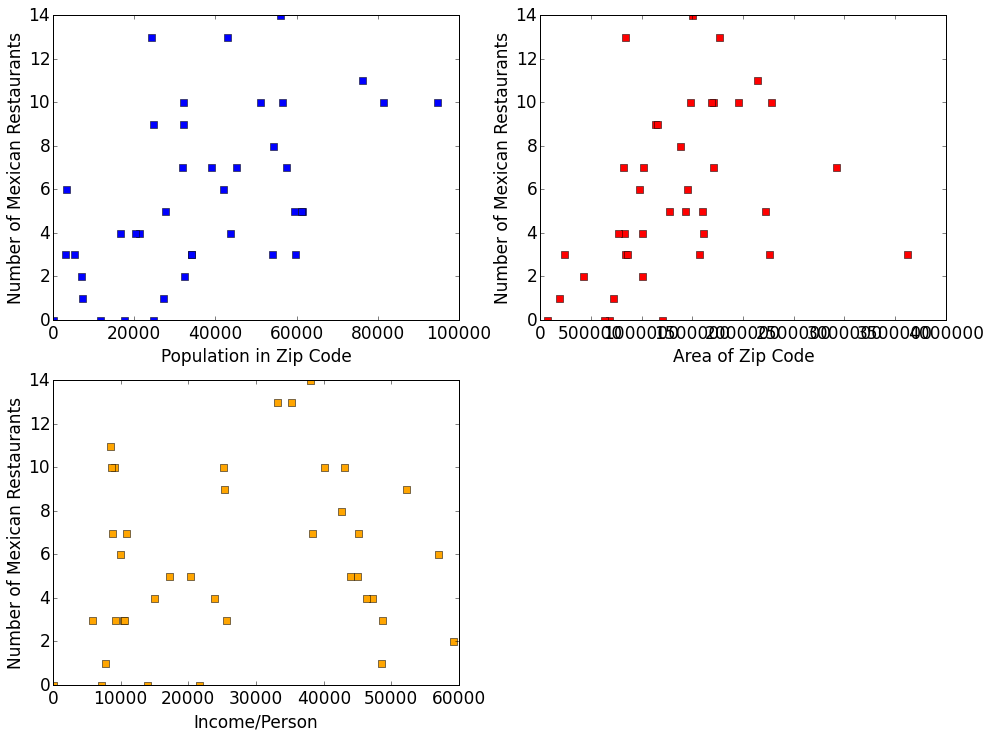

In [219]:
mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['font.size'] = 17
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(df.ZPOP,df.number_restaurants,marker='s',color='blue',linestyle="None",markersize=7,alpha=1)
ax1.set_xlabel("Population in Zip Code")
ax1.set_ylabel("Number of Mexican Restaurants")
ax2 = fig.add_subplot(222)
ax2.plot(df.ZAREALAND,df.number_restaurants,marker='s',color='red',linestyle="None",markersize=7,alpha=1)
ax2.set_xlabel("Area of Zip Code")
ax2.set_ylabel("Number of Mexican Restaurants")
ax3 = fig.add_subplot(223)
ax3.plot(df2.income,df2.number_restaurants,marker='s',color='orange',linestyle="None",markersize=7,alpha=1)
ax3.set_xlabel("Income/Person")
ax3.set_ylabel("Number of Mexican Restaurants")